# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: año de las muestras
* month: número del mes del año para la medición
* day: día del año de la medición
* week: día de la semana como carácter
* temp_2: máxima temperatura en los dos días anteriores
* temp_1: máxima temperatura el día anterior
* average: promedio histórico
* actual: temperatura máxima recogida
* friend: predicción de un amigo, 20 por encima y debajo de la temperatura promedio (no es muy buen amigo)


### 1. Importa el csv "temps.csv"

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris



In [23]:
# loading csv data to dataframe 
df = pd.read_csv('./data/temps.csv')
# ...

In [24]:
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


### 2. Realiza un análisis exploratorio

Fíjate en si hay variables faltantes, datos constantes, días informados como texto, si podemos agrupar datos por estación...

In [25]:
df.dtypes

year                int64
month               int64
day                 int64
week               object
temp_2              int64
temp_1              int64
average           float64
actual              int64
forecast_noaa       int64
forecast_acc        int64
forecast_under      int64
friend              int64
dtype: object

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [27]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [28]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


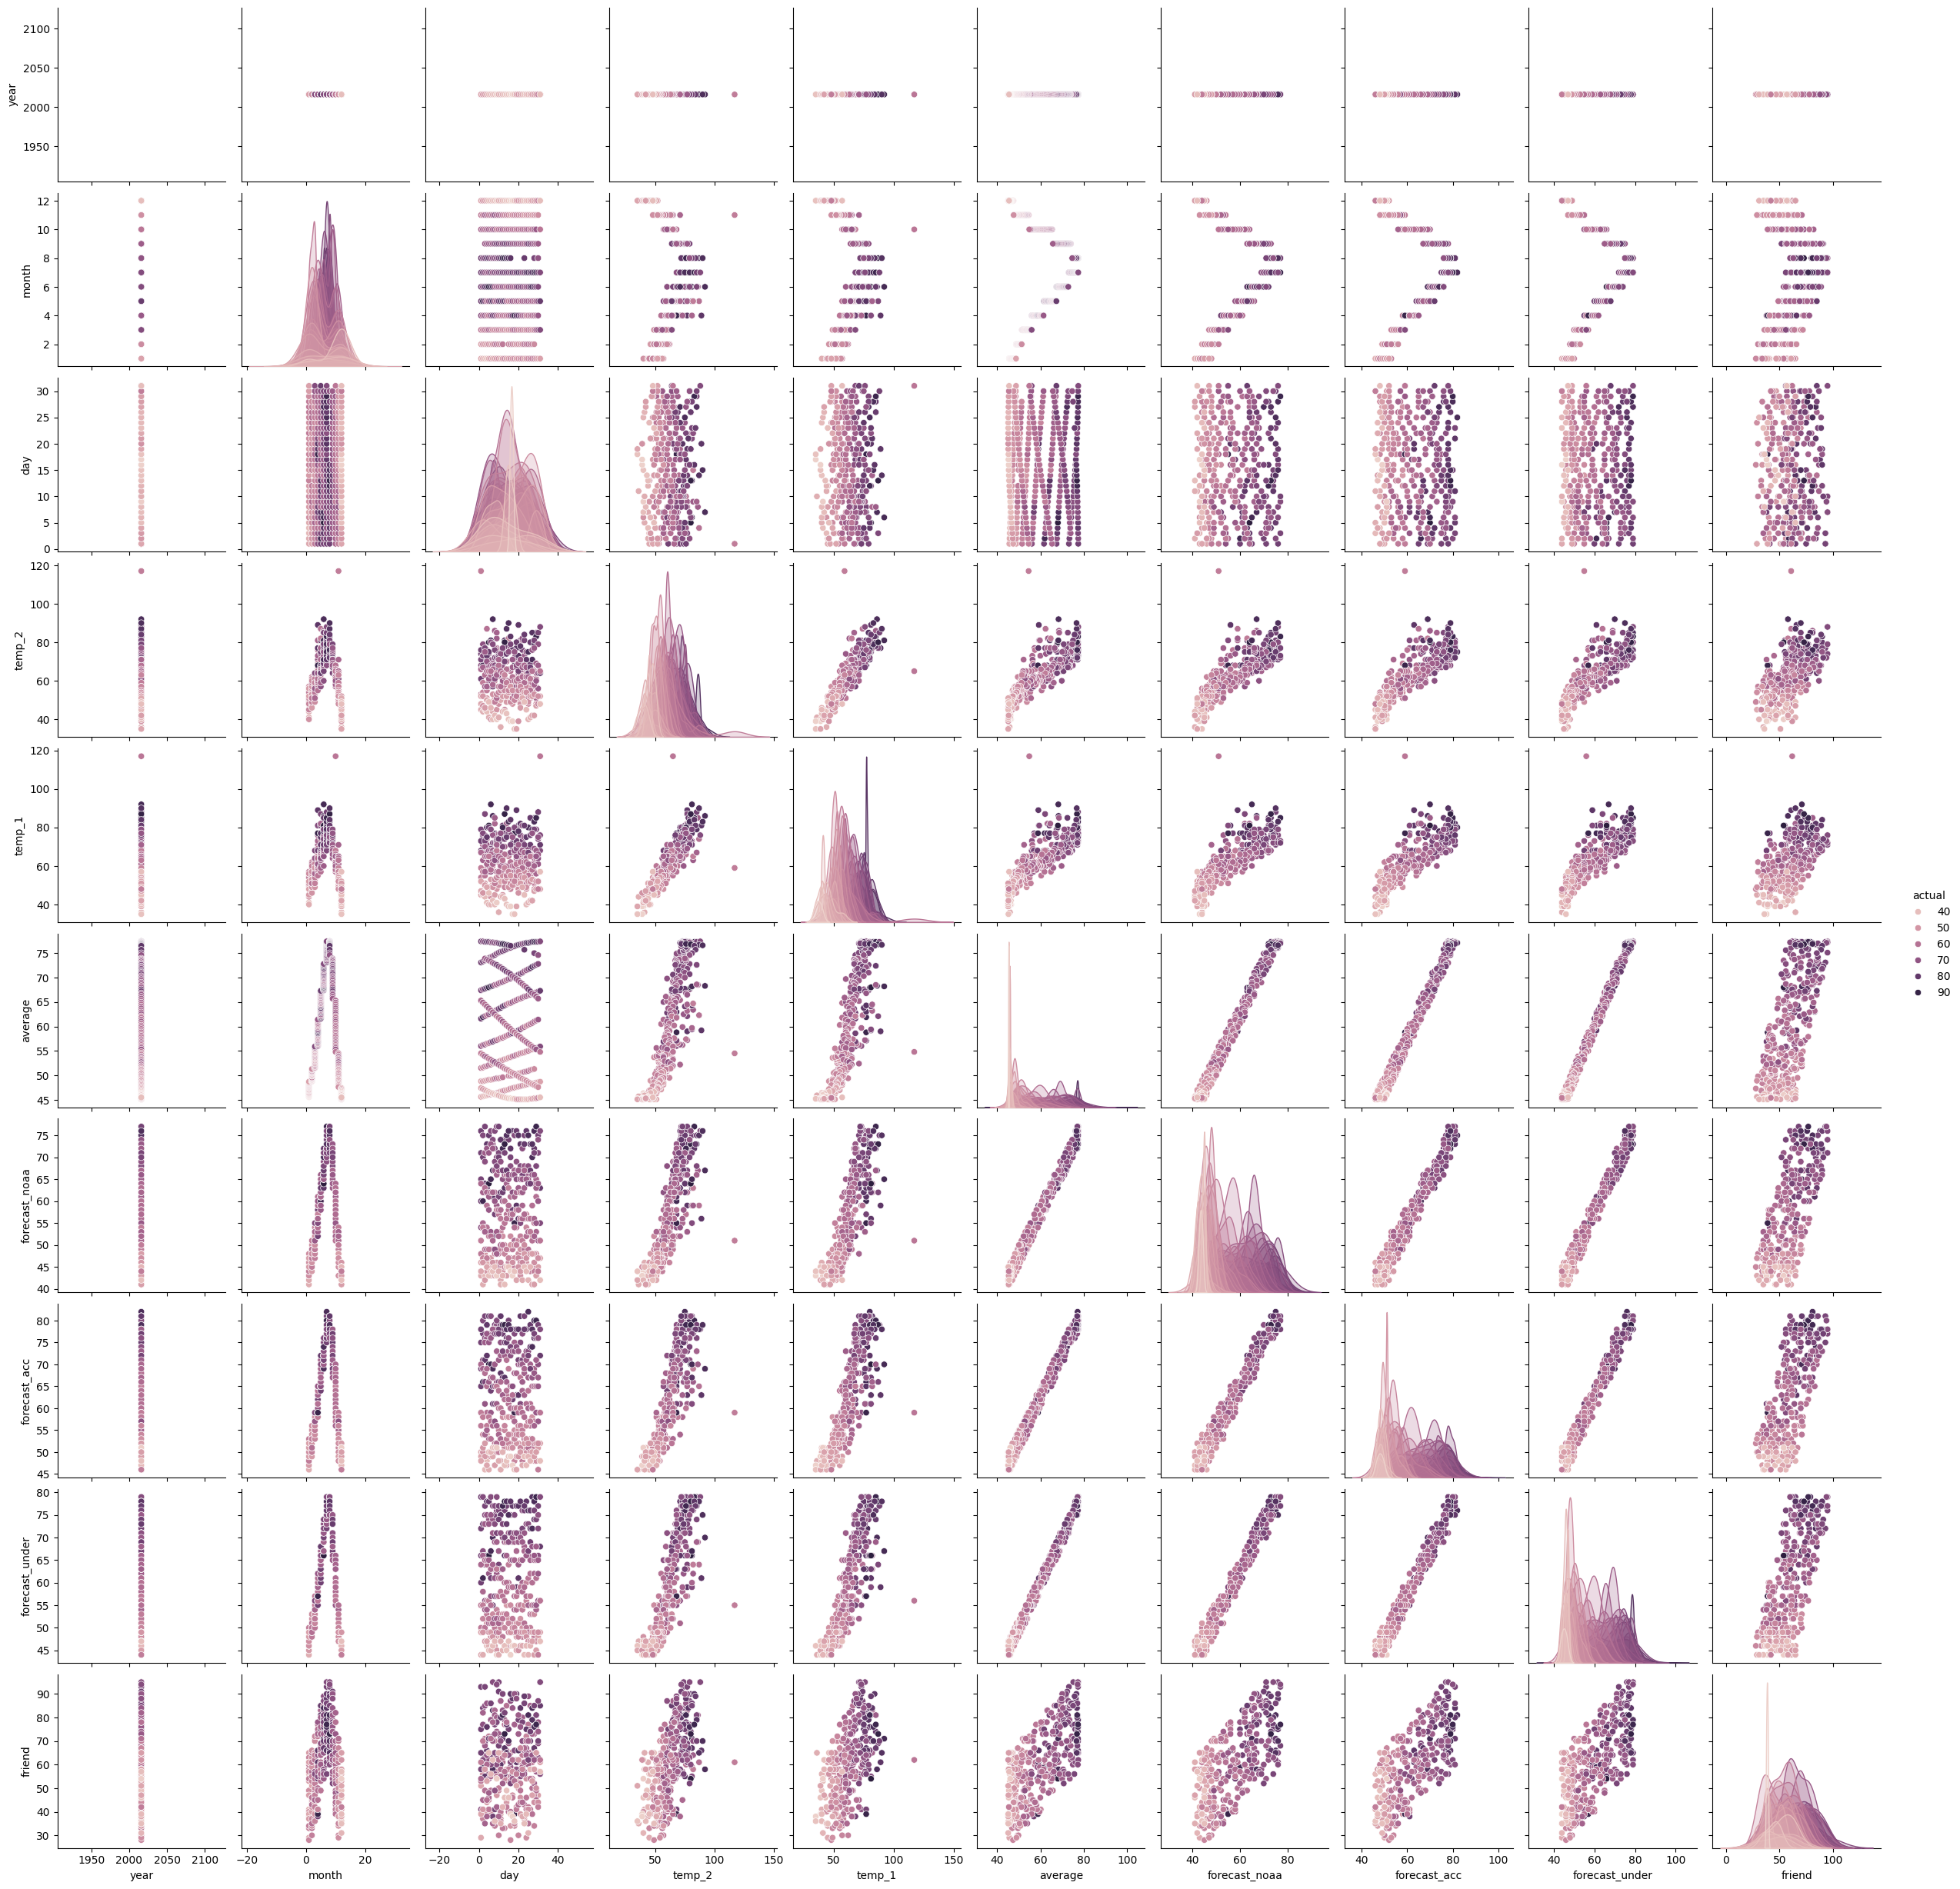

In [31]:
#Visualizamos por pares**

sns.pairplot(df, hue='actual');

### 3. Realiza la ingeniería de características

Necesitamos que todos los datos sean numéricos.

In [36]:
# Transformar los datos categóricos (mes y día) a variables dummy
df = pd.get_dummies(df, columns=['week'], drop_first=1)
df = df.astype(int)


In [37]:
df

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45,45,43,50,44,29,0,0,0,0,0,0
1,2016,1,2,44,45,45,44,41,50,44,61,0,1,0,0,0,0
2,2016,1,3,45,44,45,41,43,46,47,56,0,0,1,0,0,0
3,2016,1,4,44,41,45,40,44,48,46,53,1,0,0,0,0,0
4,2016,1,5,41,40,46,44,46,46,46,41,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,42,42,45,47,41,50,47,47,0,0,0,0,1,0
344,2016,12,28,42,47,45,48,41,49,44,58,0,0,0,0,0,1
345,2016,12,29,47,48,45,48,43,50,45,65,0,0,0,1,0,0
346,2016,12,30,48,48,45,57,44,46,44,42,0,0,0,0,0,0


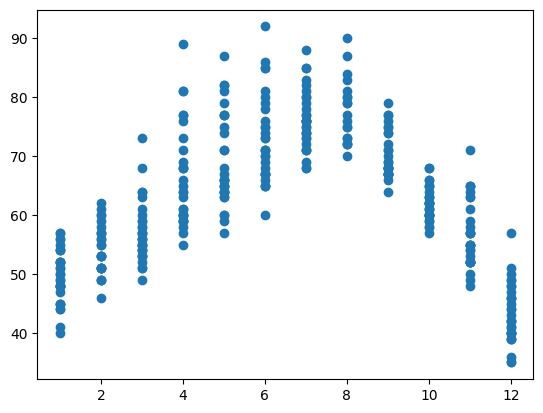

In [18]:
import matplotlib.pyplot as plt

plt.scatter(df['month'], df['actual']);

### 4. Divide en datos de entrenamiento (train) y evaluación (test)

In [38]:
# ...
df.columns

Index(['year', 'month', 'day', 'temp_2', 'temp_1', 'average', 'actual',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend', 'week_Mon',
       'week_Sat', 'week_Sun', 'week_Thurs', 'week_Tues', 'week_Wed'],
      dtype='object')

In [39]:
# Divide el conjunto de datos en _train_ y _test_
features = ['year', 'month', 'day', 'temp_2', 'temp_1', 'average',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend', 'week_Mon',
       'week_Sat', 'week_Sun', 'week_Thurs', 'week_Tues', 'week_Wed']

target = 'actual'

In [40]:
X = df[features]
X

,year,month,day,temp_2,temp_1,average,forecast_noaa,forecast_acc,forecast_under,friend,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45,43,50,44,29,0,0,0,0,0,0
1,2016,1,2,44,45,45,41,50,44,61,0,1,0,0,0,0
2,2016,1,3,45,44,45,43,46,47,56,0,0,1,0,0,0
3,2016,1,4,44,41,45,44,48,46,53,1,0,0,0,0,0
4,2016,1,5,41,40,46,46,46,46,41,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,42,42,45,41,50,47,47,0,0,0,0,1,0
344,2016,12,28,42,47,45,41,49,44,58,0,0,0,0,0,1
345,2016,12,29,47,48,45,43,50,45,65,0,0,0,1,0,0
346,2016,12,30,48,48,45,44,46,44,42,0,0,0,0,0,0


In [41]:
Y = np.log1p(df[target])
Y

0      3.828641
1      3.806662
2      3.737670
3      3.713572
4      3.806662
         ...   
343    3.871201
344    3.891820
345    3.891820
346    4.060443
347    3.713572
Name: actual, Length: 348, dtype: float64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [43]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (348, 16)
Train features shape: (243, 16)
Train target shape: (243,)
Test features shape: (105, 16)
Test target shape: (105,)


### 5. Entrena el modelo

Juega con los parámetros para ver qué ajuste obtienes.

In [ ]:
from sklearn.tree import DecisionTreeRegressor



### 6. Evaluación de tu modelo

Calcula las métricas vistas para variable continua (MAE, MAPE, MSE, RMSE)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# ...

### 7. Representa el árbol de decisión

In [58]:
from sklearn.tree import plot_tree

# ...

### 8. Utiliza un grid search con cross validation para hiperparametrizar tu modelo

In [124]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()

parameters = {
    "max_depth" : [ ... ],
    "min_samples_leaf": [ ... ],
}

dtr_gs = GridSearchCV(model, parameters, cv=5, scoring="neg_mean_absolute_error")
dtr_gs.fit(X_train, y_train)

In [ ]:
# Presenta los mejores parámetros encontrados y su puntuación (deberás inspeccionar la instancia)

In [ ]:
# Obtén el mejor estimador de la instancia

### 9. Obten el `feature_importances`

### 10. Construye un nuevo modelo `DecisionTreeClassifier` 

Queremos un modelo que clasifique cuando en un día va a hacer una temperatura mayor a 65ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [133]:
from sklearn.tree import DecisionTreeClassifier

# ...